# 필요 라이브러리

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 오류 메세지 안뜨게
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#한글 시각화
plt.rc("font", family="Malgun Gothic")

# 데이터 불러와서 확인하기

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '2. Deep EDA & Feature Engineering.ipynb',
 'adult_data.csv',
 'adult_names.txt',
 'adult_test.csv']

## raw data 간단한 전처리 진행하기

- 다른 노트북에서 진행하게 되어서 raw_data부터 시작함

### 열 설정

In [4]:
train = pd.read_csv("adult_data.csv")
train.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                 'education_num', 'marital_status', 'occupation',
                 'relationship', 'race' ,'sex' ,'capital_gain', 
                 'capital_loss', 'hours_per_week', 'native_country','income']
train.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
test =  pd.read_csv("adult_test.csv")
test.columns =  ['age', 'workclass', 'fnlwgt', 'education', 
                 'education_num', 'marital_status', 'occupation',
                 'relationship', 'race' ,'sex' ,'capital_gain', 
                 'capital_loss', 'hours_per_week', 'native_country','income']
test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


### object value값 앞 공백 삭제하기

In [6]:
#object 값에서 앞에 공백이 발생함을 확인함
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
# lstrip을 이용하여 왼쪽 공백없애기! - 테스트

train["workclass"].map(lambda x : x.lstrip()).unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
train[["workclass","education","marital_status","occupation",
       "relationship","race","sex","native_country"]] = \
train[["workclass","education","marital_status","occupation",
       "relationship","race","sex","native_country"]].applymap(lambda x : x.lstrip())

In [9]:
test[["workclass","education","marital_status","occupation",
       "relationship","race","sex","native_country"]] = \
test[["workclass","education","marital_status","occupation",
       "relationship","race","sex","native_country"]].applymap(lambda x : x.lstrip())

In [10]:
# 잘 처리되었나 확인
train.workclass.unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
test.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

## 데이터 확인하기

**데이터 열 확인**
  
  
* id  
* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
* education : 교육 수준
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값)
 * `>50K` : 1
 * `<=50K` : 0

# 데이터 추가 전처리

* 전처리한 train/test 데이터에 copy해주기  
* train -> tmp_train  //  test -> tmp_test

In [12]:
tmp_train = train.copy()
tmp_test = test.copy()

In [13]:
tmp_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## income boolen 형태로

In [14]:
#tmp_train
tmp_train.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
tmp_train.income = tmp_train.income.map(lambda x: 1 if x == ' >50K' else 0)
tmp_train.income.value_counts()

0    24719
1     7841
Name: income, dtype: int64

In [16]:
# tmp_test
tmp_test.income.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [17]:
tmp_test.income = tmp_test.income.map(lambda x: 1 if x == ' >50K.' else 0)
tmp_test.income.value_counts()

0    12434
1     3846
Name: income, dtype: int64

## 결측치

이에 앞아서 이 데이터셋에는 결측값 대신에 '?'라는 결측값이 있음을 확인할 수 있다!!

In [18]:
# ?란 값을 갖고 있는 행의 경우!
tmp_train[tmp_train.apply(lambda x: "?" in list(x), axis=1)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,1
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,1
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,0
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


==> occupation / workclass / native-country 열에서 ? 값이 보여 자세히 살펴보자!

In [19]:
tmp_train.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [20]:
tmp_train.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [21]:
train.native_country.value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [22]:
tmp_train.shape

(32560, 15)

==> occupation / workclass / native-country 열에서 각각 1843/ 1836/ 583개 임을 확인할 수 있다. 
  
  
* 각 5.7% / 5.7% / 1.8% 부분을 차지한다.

### 삭제

#### tmp_train

In [23]:
# 위 3개의 열 모두 ? 결측치를 포함하고 있는 행의 경우 삭제 처리한다. 
not_3_train = tmp_train[(tmp_train['workclass'] == '?')&
      (tmp_train['occupation'] == '?')&
      (tmp_train['native_country']=='?')]
not_3_train.shape

(27, 15)

In [24]:
not_3_train.index

Int64Index([   60,   296,  1151,  1675,  2512,  3130,  3578,  3833,  6058,
             7861,  9615, 11613, 12995, 16487, 16837, 18614, 20332, 20479,
            23728, 23914, 25358, 26295, 26362, 28193, 28687, 30368, 32524],
           dtype='int64')

In [25]:
# 27개 행의 경우 전체 데이텅에 극소량이기도 하고, 데이터 분석에 무의미하다고 판단하여 drop 한다.
tmp_train.drop(index=not_3_train.index, axis=0, inplace=True)

In [26]:
# 제대로 drop 되었는지 확인하기
tmp_train[(tmp_train['workclass'] == '?')&
      (tmp_train['occupation'] == '?')&
      (tmp_train['native_country']=='?')]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


#### tmp_test

In [27]:
not_3_test = tmp_test[(tmp_test['workclass'] == '?')&
      (tmp_test['occupation'] == '?')&
      (tmp_test['native_country']=='?')]

tmp_test.drop(index=not_3_test.index, axis=0, inplace=True)

# 제대로 drop 되었는지 확인하기
tmp_test[(tmp_test['workclass'] == '?')&
      (tmp_test['occupation'] == '?')&
      (tmp_test['native_country']=='?')]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


### 대치하기

In [28]:
tmp_train[(tmp_train['workclass'] == '?')].describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,1809.000000,1809,1809.000000,1809,1809.000000,1809,1809,1809,1809,1809,1809.000000,1809.000000,1809.000000,1809,1809.000000
unique,NaN,1,NaN,16,NaN,7,1,6,5,2,NaN,NaN,NaN,34,NaN
top,NaN,?,NaN,HS-grad,NaN,Never-married,?,Own-child,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,1809,NaN,527,NaN,757,1809,534,1492,985,NaN,NaN,NaN,1659,NaN
mean,41.001658,NaN,188245.120509,NaN,9.246545,NaN,NaN,NaN,NaN,NaN,607.508568,59.845218,31.904367,NaN,0.103372
std,20.389121,NaN,106944.058057,NaN,2.594033,NaN,NaN,NaN,NaN,NaN,5181.439822,353.328619,14.935822,NaN,0.304528
min,17.000000,NaN,12285.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,21.000000,NaN,117542.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,20.000000,NaN,0.000000
50%,35.000000,NaN,175648.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,36.000000,NaN,0.000000
75%,62.000000,NaN,234277.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000


In [29]:
# workclass
print(tmp_train[(tmp_train['workclass'] == '?')].shape)

# occupation
print(tmp_train[(tmp_train['occupation'] == '?')].shape)

# workclass & occupation
print(tmp_train[(tmp_train['workclass'] == '?')&
      (tmp_train['occupation'] == '?')].shape)

(1809, 15)
(1816, 15)
(1809, 15)


==> workclass가 ?인 경우 workclass가 ?인을 보고,  
?의 의미가 **missing 결측값**보다는, **No**의 의미라고 생각이 됨.  
  
==> ?라고 그래도 두어도 상관없지만, Raw data와 구별을 주기위해 **No**라고 대치할 예정

In [30]:
tmp_train.loc[(tmp_train['workclass'] == '?')&
      (tmp_train['occupation'] == '?'), ["workclass","occupation"]] = "No"

In [32]:
tmp_train.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
No                   1809
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [33]:
tmp_train.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
No                   1809
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

## 이상치

In [34]:
tmp_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32533.000000,3.253300e+04,32533.000000,32533.000000,32533.000000,32533.000000,32533.000000
mean,38.581963,1.897678e+05,10.080503,1078.045554,87.277657,40.443703,0.240894
std,13.638480,1.055405e+05,2.572376,7388.289325,402.940233,12.345148,0.427633
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178020e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783700e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369940e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


==> `capital_gain`과 `capital_loss`의 경우 25,50,75% 모두 0이라는 것을 볼 수 있다.

##### capital_gain

Text(0.5, 0.98, "tmp_train 중 'capital_gain' 데이터 살펴보기")

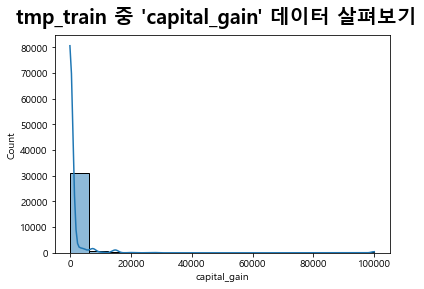

In [35]:
#시각화로 그려보자면

fig, ax = plt.subplots(1,1)
sns.histplot(data = tmp_train['capital_gain'], kde=True)

plt.suptitle("tmp_train 중 'capital_gain' 데이터 살펴보기",
             fontsize= 20,
             fontweight= "bold")

In [36]:
# 좀더 살펴보자면
value_90 = tmp_train['capital_gain'].quantile(.90)
value_95 = tmp_train['capital_gain'].quantile(.95)
value_99 = tmp_train['capital_gain'].quantile(.99)
f'90%데이터는 {value_90} // 95% 데이터는 {value_95} // 99% 데이터는 {value_99}'

'90%데이터는 0.0 // 95% 데이터는 5013.0 // 99% 데이터는 15024.0'

### log를 취하여 가운데로 끌어오쟈!

In [37]:
# 0이 아닐 때 로그 취할 수 있도록 꼭 조건 설정하기!

tmp_train["log_capital_gain"] = \
tmp_train['capital_gain'].map(lambda x : np.log(x) if x!=0 else 0)

tmp_test["log_capital_gain"] = \
tmp_test['capital_gain'].map(lambda x : np.log(x) if x!=0 else 0)

Text(0.5, 0.98, "tmp_train 중 'log_capital_gain' 데이터 살펴보기")

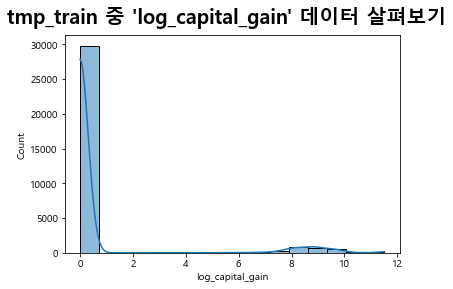

In [38]:
fig, ax = plt.subplots(1,1)
sns.histplot(data = tmp_train['log_capital_gain'], kde=True)

plt.suptitle("tmp_train 중 'log_capital_gain' 데이터 살펴보기",
             fontsize= 20,
             fontweight= "bold")

##### capital_loss

In [39]:
# gain과 동일하게 log를 취해준다!
# 0이 아닐 때 로그 취할 수 있도록 꼭 조건 설정하기!

tmp_train["log_capital_loss"] = \
tmp_train['capital_loss'].map(lambda x : np.log(x) if x!=0 else 0)

tmp_test["log_capital_loss"] = \
tmp_test['capital_loss'].map(lambda x : np.log(x) if x!=0 else 0)

Text(0.5, 0.98, "tmp_train 중 'log_capital_loss' 데이터 살펴보기")

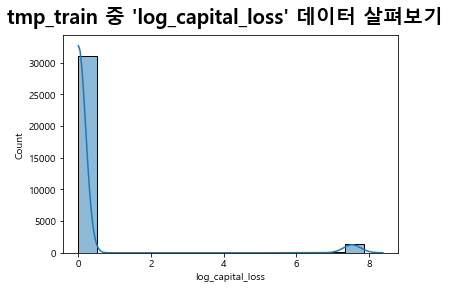

In [40]:
fig, ax = plt.subplots(1,1)
sns.histplot(data = tmp_train['log_capital_loss'], kde=True)

plt.suptitle("tmp_train 중 'log_capital_loss' 데이터 살펴보기",
             fontsize= 20,
             fontweight= "bold")

## 스케일링 (scaling)

In [41]:
tmp_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,log_capital_gain,log_capital_loss
count,32533.000000,3.253300e+04,32533.000000,32533.000000,32533.000000,32533.000000,32533.000000,32533.000000,32533.000000
mean,38.581963,1.897678e+05,10.080503,1078.045554,87.277657,40.443703,0.240894,0.734217,0.350124
std,13.638480,1.055405e+05,2.572376,7388.289325,402.940233,12.345148,0.427633,2.454230,1.584146
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178020e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783700e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
75%,48.000000,2.369940e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,11.512915,8.379309


> **min_max 스케일링과 standard 스케일링** 두가지 방법으로 변환시켜보자!
  
   
* Min-max Scaler: 범위가 정해진 값이 필요할 때 사용한다. 이상치에 민감함
* Standard Scaler: 평균을 0, 표준편차를 1로 맞추어 정규분포의 특성을 가지도록 만든다. 이상치에 영향을 덜 받음

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 변수 지정해주기
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

##### fnlwgt

`fnlwgt`열은 사람 대표성을 나타내는 가중치(final weight의 약자)인데, **스케일링**을 통해 좀더 직관적인 분석이 가능할 거라 생각함

In [43]:
# min_max
tmp_train['mm_fnlwgt']= mm_scaler.fit_transform(tmp_train.fnlwgt.values.reshape(-1,1))
tmp_test['mm_fnlwgt']= mm_scaler.fit_transform(tmp_test.fnlwgt.values.reshape(-1,1))

In [44]:
# standard
tmp_train['st_fnlwgt']= st_scaler.fit_transform(tmp_train.fnlwgt.values.reshape(-1,1))
tmp_test['st_fnlwgt']= st_scaler.fit_transform(tmp_test.fnlwgt.values.reshape(-1,1))

In [45]:
# 살펴보기 -> min_max
tmp_train.describe()[["mm_fnlwgt"]]

,mm_fnlwgt
count,32533.000000
mean,0.120538
std,0.071678
min,0.000000
25%,0.071662
50%,0.112797
75%,0.152612
max,1.000000


In [46]:
# 살펴보기 -> standard
tmp_train.describe()[["st_fnlwgt"]].round(6)

,st_fnlwgt
count,32533.000000
mean,0.000000
std,1.000015
min,-1.681682
25%,-0.681889
50%,-0.107996
75%,0.447477
max,12.269770


# Feature Engineering

## 인코딩(Encoding)

In [47]:
tmp_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,log_capital_loss,mm_fnlwgt,st_fnlwgt
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.000000,0.0,0.048238,-1.008698
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.000000,0.0,0.138113,0.245201
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.000000,0.0,0.151068,0.425940
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.000000,0.0,0.221488,1.408403
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0.000000,0.0,0.184932,0.898382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.000000,0.0,0.166404,0.639899
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.000000,0.0,0.096500,-0.335363
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.000000,0.0,0.094827,-0.358710
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.000000,0.0,0.128499,0.111070


In [48]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder()
le = LabelEncoder()

### OneHot Encoding

In [49]:
# 고유값 확인/비교 하기
print('workclass 고유값',tmp_train.workclass.nunique(),' & occupation 고유값',tmp_train.occupation.nunique())

workclass 고유값 9  & occupation 고유값 16


In [50]:
# 문자열 feature 확인하기
tmp_train.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
income                int64
log_capital_gain    float64
log_capital_loss    float64
mm_fnlwgt           float64
st_fnlwgt           float64
dtype: object

income에 가장 영향을 줄거라 예상하면서, 고유값이 적은 문자열 feature로  
**`workclass`**를 **`OnehotEncoding`**

In [51]:
ohe_result = ohe.fit_transform(tmp_train.workclass.values.reshape(-1,1))

In [52]:
# OneHot인코딩 열이름 얻기
ohe.get_feature_names(["workclass"])

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_No', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay'], dtype=object)

In [53]:
# OneHot인코딩에 따른 df 만들기
sub = pd.DataFrame(data=ohe_result.toarray(), columns=ohe.get_feature_names(["workclass"]))

In [54]:
sub

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_No,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32528,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32529,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32531,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 일괄적으로 OneHot Encoding

* 문자열의 경우 일괄적으로 원핫인코딩 변환하기

In [55]:
tmp_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,log_capital_loss,mm_fnlwgt,st_fnlwgt
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.000000,0.0,0.048238,-1.008698
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.000000,0.0,0.138113,0.245201
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.000000,0.0,0.151068,0.425940
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.000000,0.0,0.221488,1.408403
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0.000000,0.0,0.184932,0.898382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.000000,0.0,0.166404,0.639899
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.000000,0.0,0.096500,-0.335363
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.000000,0.0,0.094827,-0.358710
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.000000,0.0,0.128499,0.111070


In [57]:
dummied = pd.get_dummies(train)
dummied

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_ <=50K,income_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32556,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32557,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32558,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Label Encoding

#### 자동적으로 라벨인코딩

- 성별의 경우 Label Encoding 진행하기

In [58]:
le_result = le.fit_transform(tmp_train.sex.values.reshape(-1,1))
le_result

array([1, 1, 1, ..., 0, 1, 0])

#### 직접 라벨인코딩

In [59]:
for col in tmp_train:
    if tmp_train[col].dtype == "object":
        cat= tmp_train[col].unique()
        print(f'[{col}]--({len(cat)}개)')

[workclass]--(9개)
[education]--(16개)
[marital_status]--(7개)
[occupation]--(16개)
[relationship]--(6개)
[race]--(5개)
[sex]--(2개)
[native_country]--(42개)


In [60]:
tmp_train.describe(include="object")

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,32533,32533,32533,32533,32533,32533,32533,32533
unique,9,16,7,16,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10496,14966,4140,13188,27797,21777,29169


* 미국성인을 대상으로 조사한 데이터이기에, race와 native_country를 인코딩 변별력이 적고
* sex의 Male과 relationship의 Husband가 자동 생각이 되고
* relationship과 marital_status이 연관이 있기에,
* 이외 열 고려해보기

In [61]:
tmp_train.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

==> 각 열 구분 기준이 일정치 않아 인코딩에 부적합  

==> 그 다음 workclass feature가 적은 고유값이기도 하고 알고리즘 이해하기 좋을거라 생각됨

In [62]:
workclass_to_num = dict(zip( tmp_train.workclass.unique(), [0,1,2,3,4,5,6,7,8,9] ))
workclass_to_num

{'Self-emp-not-inc': 0,
 'Private': 1,
 'State-gov': 2,
 'Federal-gov': 3,
 'Local-gov': 4,
 'No': 5,
 'Self-emp-inc': 6,
 'Without-pay': 7,
 'Never-worked': 8}

In [63]:
# 라벨인코딩 적용하기
tmp_train.workclass.map(workclass_to_num)

0        0
1        1
2        1
3        1
4        1
        ..
32555    1
32556    1
32557    1
32558    1
32559    6
Name: workclass, Length: 32533, dtype: int64

## 주성분 분석 PCA

 **주성분 분석이란?**  
 
 여러 변수들의 변량을 주성분이라는 서로 상관성이 높은 변수들의 선형 결합으로 만들어, 기존의 상관성이 높은 변수들을 요약, 축소하는 기법

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60, svd_solver="full")

In [85]:
# 108개의 차원을 고유 60개 벡터값으로 변환
pca.components_.shape

(60, 108)

In [73]:
dummied.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_ <=50K,income_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [71]:
# dummied는 일괄 원핫인코딩
# target이 되는 income열은 삭제하여 dummied_2 변수 설정

dummied_2 = dummied.drop(columns=['income_ <=50K', 'income_ >50K'])

In [74]:
# standard 스케일링 
x_train_std = st_scaler.fit_transform(dummied_2)

# 원핫인코딩 + standard 스케일링 + pca
x_train_pca = pca.fit_transform(x_train_std)

In [83]:
# 고유벡터
x_train_pca

array([[ 2.84411571, -1.43625373, -0.13023268, ...,  0.09764501,
        -0.16929678, -0.11948095],
       [-0.67893597,  0.90173536, -1.25864868, ..., -0.16232403,
         0.18496197, -0.27310413],
       [ 0.81701879,  2.55870627,  0.81723833, ...,  0.14409886,
         0.26680533, -0.74818709],
       ...,
       [-2.28654853, -0.82213703,  0.14061334, ...,  0.24341489,
         0.32992256, -0.19351627],
       [-1.86399995,  1.20893405, -1.81856377, ..., -0.081243  ,
        -0.01033846, -0.02718899],
       [ 0.71372019, -1.67557869,  0.4863651 , ...,  0.11992863,
         0.03440735, -0.46542326]])

In [75]:
x_train_pca.shape

(32560, 60)

In [76]:
# 설명된 분산: 선택한 60개를 가지고 feature로 제공하자
pca.explained_variance_ratio_

array([0.04198328, 0.02786226, 0.0241263 , 0.02267769, 0.02148543,
       0.01767747, 0.01613952, 0.01491796, 0.01395268, 0.01319675,
       0.01281868, 0.01219508, 0.01197298, 0.01158458, 0.011418  ,
       0.01129669, 0.01110701, 0.01086691, 0.01077839, 0.01060199,
       0.01045926, 0.01037265, 0.01032943, 0.01015888, 0.01013518,
       0.01008757, 0.01003729, 0.00998514, 0.00990639, 0.00983841,
       0.00981136, 0.00977929, 0.00973006, 0.00968266, 0.00967308,
       0.00961067, 0.00957963, 0.00953053, 0.00948592, 0.00945948,
       0.00943879, 0.00937424, 0.00936205, 0.00933634, 0.00931195,
       0.0092991 , 0.00929061, 0.0092839 , 0.00927656, 0.00927154,
       0.00927061, 0.00926766, 0.00926689, 0.00925966, 0.00925195,
       0.00924949, 0.00923672, 0.0092333 , 0.00921323, 0.00920888])

In [81]:
# standard 스케일링한것에 평균을 빼주는 스킬
x_train_2 = x_train_std - x_train_std.mean(axis=0)

In [86]:
pca.components_.shape

(60, 108)

In [82]:
x_train_2.shape

(32560, 108)

In [79]:
# numpy.dot(): 행렬 곱
# 행렬곱 함수를 하기 위해서 pca.components_를 역행렬로 취해준다.
res = np.dot(x_train_2, pca.components_.T)
res

array([[ 2.84411571, -1.43625373, -0.13023268, ...,  0.09764501,
        -0.16929678, -0.11948095],
       [-0.67893597,  0.90173536, -1.25864868, ..., -0.16232403,
         0.18496197, -0.27310413],
       [ 0.81701879,  2.55870627,  0.81723833, ...,  0.14409886,
         0.26680533, -0.74818709],
       ...,
       [-2.28654853, -0.82213703,  0.14061334, ...,  0.24341489,
         0.32992256, -0.19351627],
       [-1.86399995,  1.20893405, -1.81856377, ..., -0.081243  ,
        -0.01033846, -0.02718899],
       [ 0.71372019, -1.67557869,  0.4863651 , ...,  0.11992863,
         0.03440735, -0.46542326]])

In [80]:
# numpy.allclose( ): 두 배열이 공차 내에서 요소별로 동일한 경우 True를 반환
np.allclose(x_train_pca, res)

True